<a href="https://colab.research.google.com/github/sanidhya2506/ML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple ANN Example**




In [11]:
import tensorflow as tf          # Google's library for Deep Learning
from tensorflow import keras     # High-level API that makes DL easy
from tensorflow.keras import layers  # For building neural network layers
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs


In [13]:
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
passed = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=float)


In [14]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1], activation='sigmoid')
])

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(hours_studied, passed, epochs=200, verbose=0)


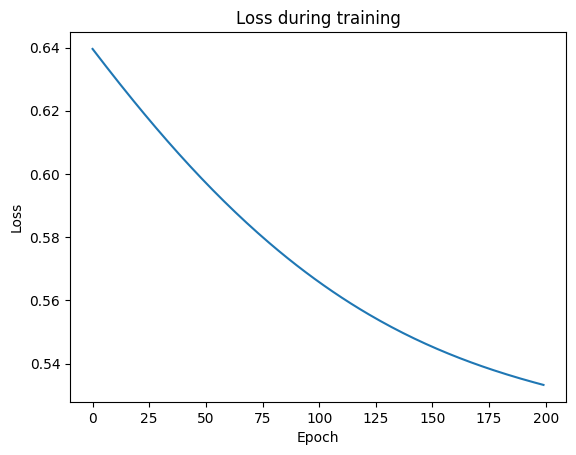

In [17]:
plt.plot(history.history['loss'])
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [20]:
import numpy as np

print("If a student studies 3.5 hours:", model.predict(np.array([[3.5]])))
print("If a student studies 7 hours:", model.predict(np.array([[7]])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
If a student studies 3.5 hours: [[0.67878044]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
If a student studies 7 hours: [[0.8426068]]


**Advance ANN Example**


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Creating random but logical data
np.random.seed(42)

# Input features
hours_studied = np.random.uniform(0, 10, 200)
sleep_hours = np.random.uniform(4, 10, 200)
attendance = np.random.uniform(60, 100, 200)

# Logical relationship for output
# More study + good sleep + attendance => more chance to pass
score = (0.5 * hours_studied) + (0.3 * sleep_hours) + (0.2 * (attendance / 10))
passed = (score > 7).astype(int)  # 1 = pass, 0 = fail

# Combine inputs into single dataset
X = np.column_stack((hours_studied, sleep_hours, attendance))
y = passed


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(3,)),  # hidden layer
    layers.Dense(4, activation='relu'),                    # hidden layer
    layers.Dense(1, activation='sigmoid')                  # output layer
])


In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3583 - loss: 3.9702 - val_accuracy: 0.3250 - val_loss: 3.6072
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3525 - loss: 3.4715 - val_accuracy: 0.3250 - val_loss: 2.9917
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3326 - loss: 2.8977 - val_accuracy: 0.3250 - val_loss: 2.4373
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3113 - loss: 2.4468 - val_accuracy: 0.3250 - val_loss: 1.9434
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3481 - loss: 1.8269 - val_accuracy: 0.3250 - val_loss: 1.5525
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3602 - loss: 1.4513 - val_accuracy: 0.3250 - val_loss: 1.2592
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3241 - loss: 1.2282 - val_accuracy: 0.3250 - val_loss: 1.0321
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3077 - loss: 1.0208 - val_accuracy: 0.3250

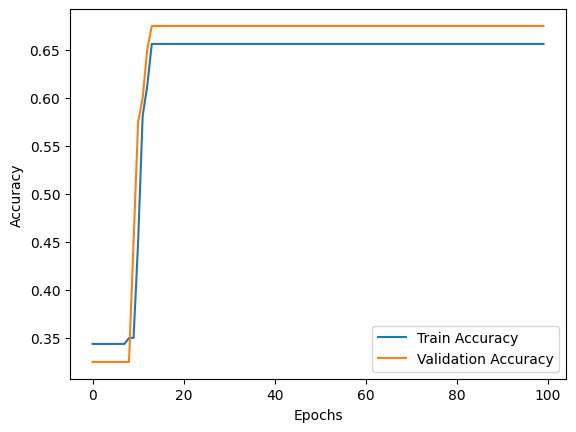

In [27]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7104 - loss: 0.6286
Model Accuracy: 67.50%


In [29]:
# Example: new student data
new_student = np.array([[8, 7, 90]])  # hours_studied, sleep_hours, attendance
pred = model.predict(new_student)
print("Predicted Pass Probability:", pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Pass Probability: 0.400744
